### Initial Setup

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Models
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train_dataset = pd.read_csv('/content/drive/MyDrive/Dataset/Regression and Prediction/Mobile Price/train.csv')

### Exploratory Data Analysis

#### Whole Dataset

In [ ]:
train_dataset.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[5 rows x 21 columns]

The train dataset has 2000 rows with 21 columns (20 independent and 1 dependent variable)

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

There are no missing value from each columns

In [ ]:
train_dataset.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [ ]:
print(train_dataset.shape)

(2000, 21)
(1000, 21)


In [ ]:
train_dataset.iloc[0, :]

battery_power     842.0
blue                0.0
clock_speed         2.2
dual_sim            0.0
fc                  1.0
four_g              0.0
int_memory          7.0
m_dep               0.6
mobile_wt         188.0
n_cores             2.0
pc                  2.0
px_height          20.0
px_width          756.0
ram              2549.0
sc_h                9.0
sc_w                7.0
talk_time          19.0
three_g             0.0
touch_screen        0.0
wifi                1.0
price_range         1.0
Name: 0, dtype: float64

In [ ]:
# Separate continuous and binary data

bin_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
int_features = [x for x in train_dataset.columns if x not in bin_features]

#### Univariate Analysis

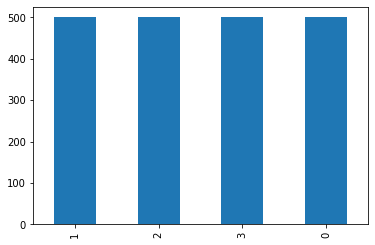

In [ ]:
train_dataset['price_range'].value_counts().plot(kind='bar')

Fortunately, the dataset has a balanced labels

#### binary features

To understand the correlation between categorical features and the price range

In [ ]:
bin_features

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

> **blue**

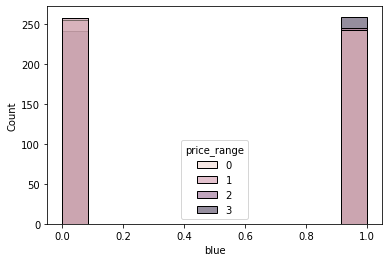

In [ ]:
sns.histplot(data=train_dataset, x=bin_features[0], hue=train_dataset['price_range'])

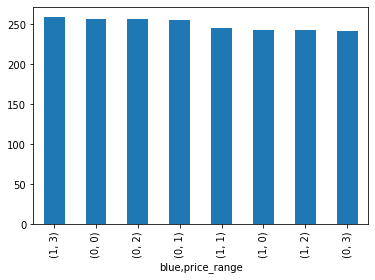

In [ ]:
train_dataset[['blue', 'price_range']].value_counts().plot(kind='bar')

> **dual_sim**

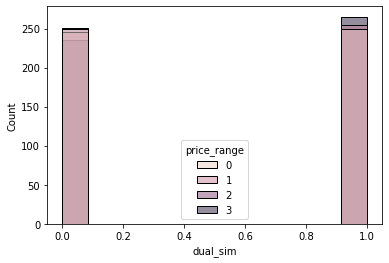

In [ ]:
sns.histplot(data=train_dataset, x=bin_features[1], hue=train_dataset['price_range'])

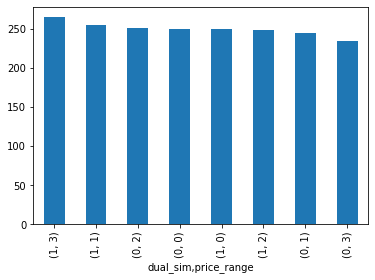

In [ ]:
train_dataset[['dual_sim', 'price_range']].value_counts().plot(kind='bar')

> **four_g**

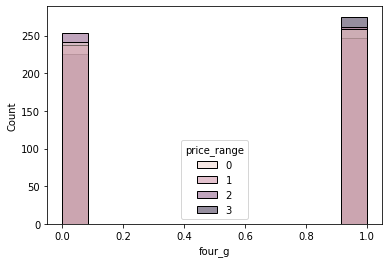

In [ ]:
sns.histplot(data=train_dataset, x=bin_features[2], hue=train_dataset['price_range'])

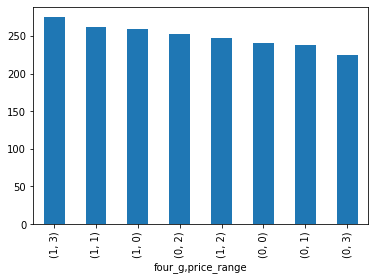

In [ ]:
train_dataset[['four_g', 'price_range']].value_counts().plot(kind='bar')

> **three_g**

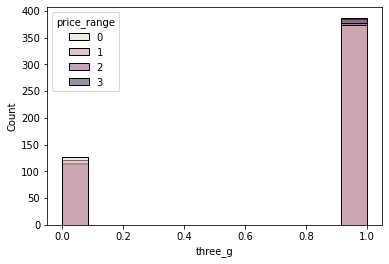

In [ ]:
sns.histplot(data=train_dataset, x=bin_features[3], hue=train_dataset['price_range'])

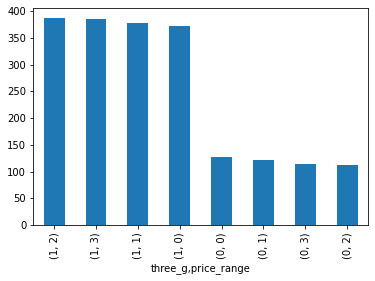

In [ ]:
train_dataset[['three_g', 'price_range']].value_counts().plot(kind='bar')

> **touch_screen**

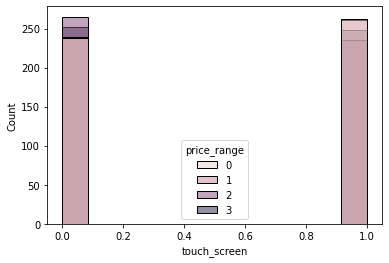

In [ ]:
sns.histplot(data=train_dataset, x=bin_features[4], hue=train_dataset['price_range'])

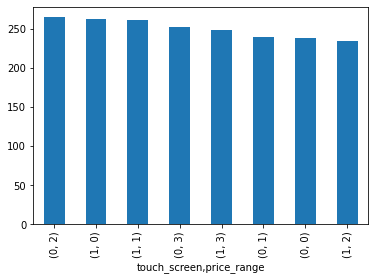

In [ ]:
train_dataset[['touch_screen', 'price_range']].value_counts().plot(kind='bar')

> **wifi**

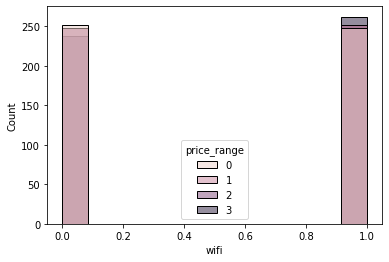

In [ ]:
sns.histplot(data=train_dataset, x=bin_features[5], hue=train_dataset['price_range'])

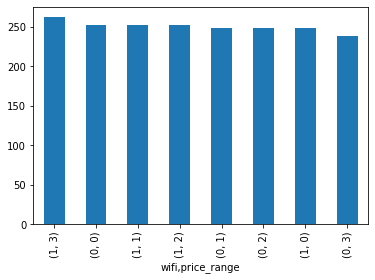

In [ ]:
train_dataset[['wifi', 'price_range']].value_counts().plot(kind='bar')

**Conclusion**: there are no correlation between binary variables and the label. Therefore, we can drop the binary variables from the dataset.

#### Integer Variables

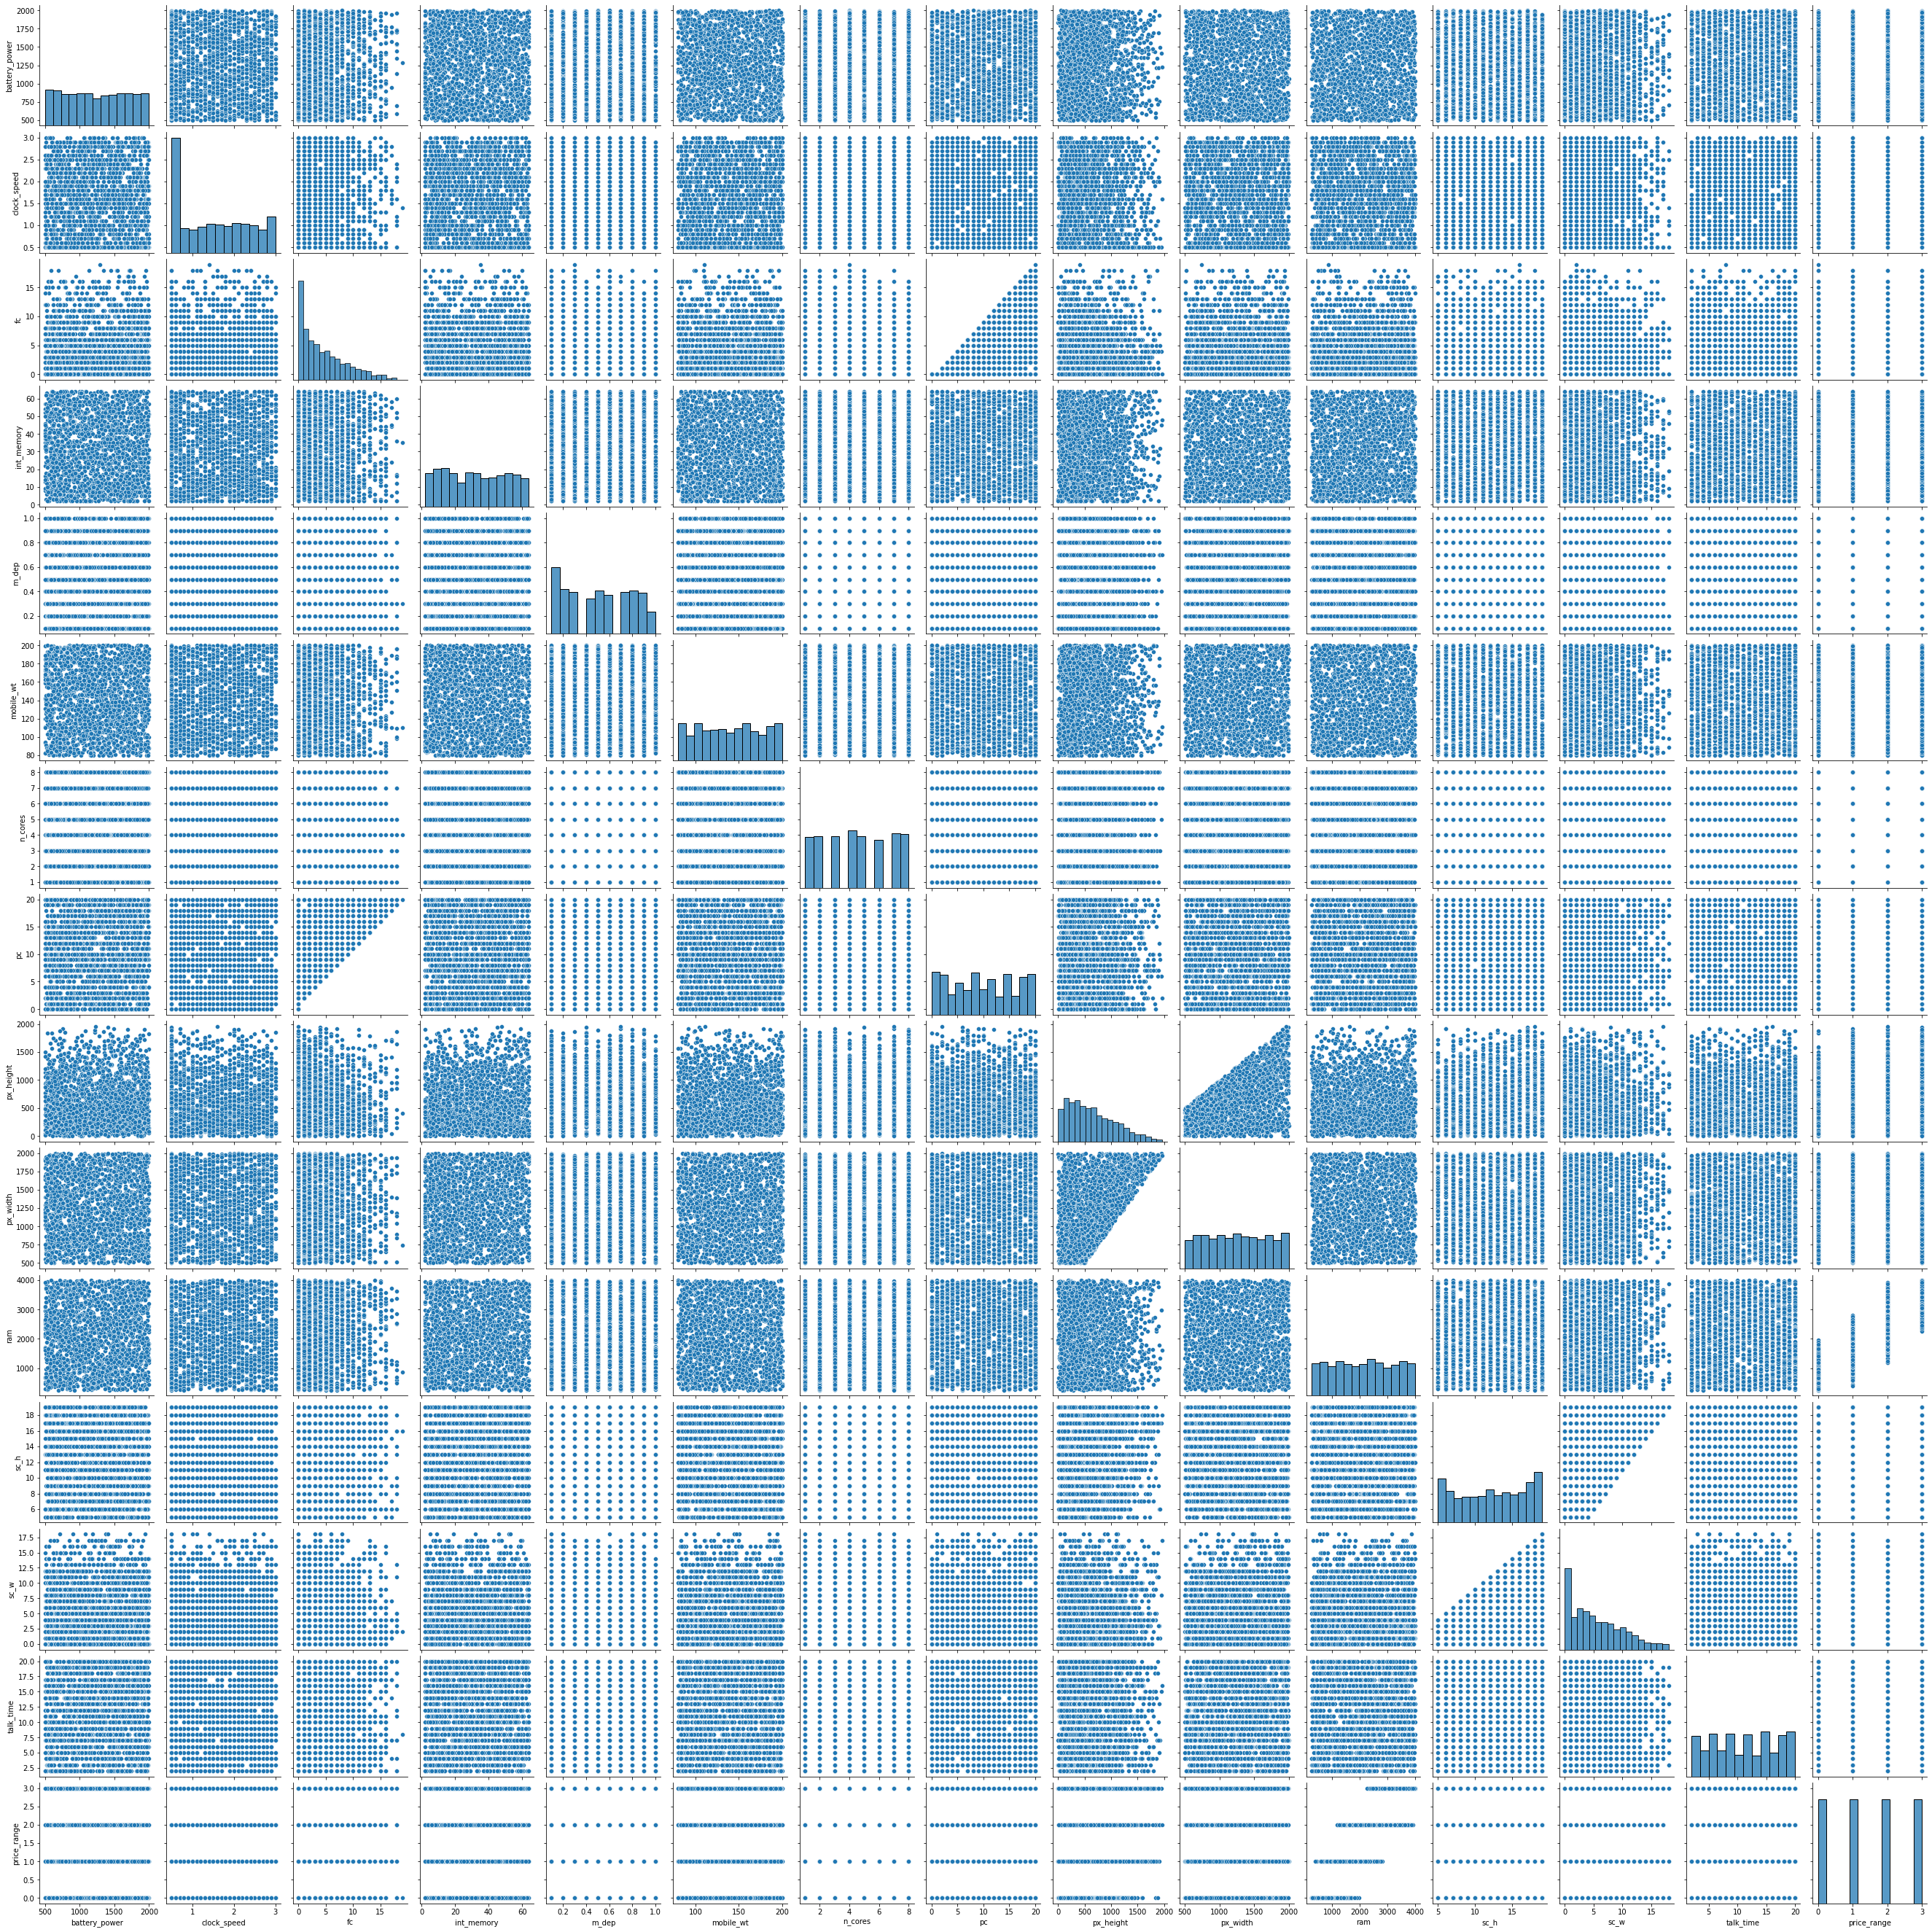

In [ ]:
sns.pairplot(train_dataset[int_features])

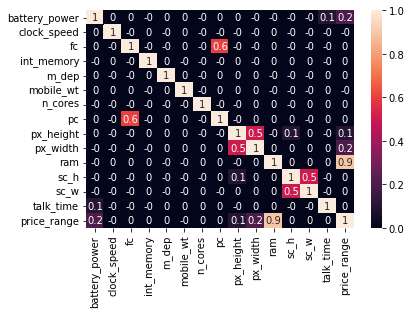

In [ ]:
sns.heatmap(train_dataset[int_features].corr().round(1), annot=True)

**Conclusion**: From the plots (pairplot and heatmap), the only continuous features that have correlation with the label are **battery_power** (weak, 0.2), **px_height** (weak, 0.1), **px_width** (weak, 0.2), and **ram** (strong, 0.9). Therefore, we will try to use these features.

### Preprocessing

In [ ]:
# Take usable features

usable_variables = ['battery_power', 'px_height', 'px_width', 'ram', 'price_range']
df = train_dataset[usable_variables].copy()
df.tail()

battery_power  px_height  px_width   ram  price_range
1995            794       1222      1890   668            0
1996           1965        915      1965  2032            2
1997           1911        868      1632  3057            3
1998           1512        336       670   869            0
1999            510        483       754  3919            3

In [ ]:
# Train Test Split

X = df.drop(['price_range'], axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1600, 4) (1600,)
(400, 4) (400,)


In [ ]:
X_train

battery_power  px_height  px_width   ram
1264            676        864      1011  2064
722            1156       1214      1262  1796
210            1395        213       705  2571
252             708         78       654  2169
297            1329       1053      1458  1228
...             ...        ...       ...   ...
1122           1871        275      1966  2727
1346           1446        351      1769  3340
1406           1731        142      1039  1220
1389           1801        100      1708   258
1534            622        760      1964  3183

[1600 rows x 4 columns]

In [ ]:
# Standardization

scaler = StandardScaler()
scaler.fit(X_train[:])
X_train[:] = scaler.transform(X_train.loc[:])
X_train[:].tail()

battery_power  px_height  px_width       ram
1122       1.457735  -0.838388  1.642181  0.566133
1346       0.491086  -0.667549  1.186611  1.128347
1406       1.139309  -1.137355 -0.501540 -0.816015
1389       1.298522  -1.231766  1.045546 -1.698315
1534      -1.383075   0.251831  1.637556  0.984354

### Modelling

> **Test Data Preparation**

In [ ]:
# Scaling test set

X_test.loc[:] = scaler.transform(X_test[:])
X_test.tail()

battery_power  px_height  px_width       ram
1591       1.364482  -0.422531  0.756479  0.205692
605        1.473656  -1.045192 -1.611557  0.551458
319       -0.302703  -0.514694  1.521929 -0.352854
320       -1.141982  -0.143795 -1.112049 -1.170036
1302       1.587379  -0.941790 -0.582479 -1.296603

> **Model Preparation**

In [ ]:
# Initialize models

logreg_model = LogisticRegression()
svm_model = svm.SVC(kernel='linear')
rf_model = RandomForestClassifier()

# Fit the models with train data

logreg_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Logistic Regression

y_pred = logreg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        87
           1       0.96      0.94      0.95       100
           2       0.95      0.92      0.93       116
           3       0.94      0.96      0.95        97

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [ ]:
# SVM

y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        87
           1       0.95      0.94      0.94       100
           2       0.94      0.91      0.93       116
           3       0.94      0.95      0.94        97

    accuracy                           0.94       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.94      0.94      0.94       400



In [ ]:
# Random Forest

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        87
           1       0.88      0.92      0.90       100
           2       0.92      0.84      0.87       116
           3       0.92      0.93      0.92        97

    accuracy                           0.91       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.91      0.91      0.91       400



**Conclusion**: Overall, **Logistic Regression** model reached the highest performance with 95% accuracy compared to other models (**SVM** (94%) and **Random Forest** (91%)). Therefore, **Logistic Regression** will be used as the best baseline model.